In [14]:
# Load components

import numpy as np
import matplotlib.pyplot as plt
from landlab import RasterModelGrid
from DE_Diffuser import DE_Diffuser


In [15]:
# Domain parameters

nrows = 30
ncols = 3
dx = 10

In [16]:
# First - test with homogeneous diffusivity

grid = RasterModelGrid((int(nrows), int(ncols)), xy_spacing=int(dx))
grid.set_closed_boundaries_at_grid_edges(True, True, True, False)
topo = grid.add_zeros('topographic__elevation', at='node')
de_diffuser = DE_Diffuser(grid) # Discrete-event diffuser component

In [17]:
# main loop

Ttot = 1000000 # total simulation time
t_clock = de_diffuser._t_clock

while t_clock < Ttot:
    de_diffuser.select_and_update_event()
    de_diffuser.event_synchronization()
    de_diffuser.event_scheduling()
    t_clock = de_diffuser._t_clock
    print('time = ', np.round(t_clock,1), ' -->  ', np.round(t_clock/Ttot,1)*100, ' % out of Ttot')


time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  3500.0  -->   0.0  % out of Ttot
time =  7000.0  -->   0.0  % out of Ttot
time =  10500.0  -->   0.0  % out of Ttot
time =  14000.0  -->   0.0  % out of Ttot
time =  17500.0  -->   0.0  % out of Ttot
time =  21000.0  -->   0.0  % out of Ttot
time =  24500.0  -->   0.0  % out of Ttot
time =  28000.0  -->   0.0  % out of Ttot
time =  31500.0  -->   0.0  % out of Ttot
time =  35000.0  -->   0.0  % out of Ttot
time =  38500.0  -->   0.0  % out of Ttot
time =  42000.0  -->   0.0  % out of Ttot
time =  45500.0  -->   0.0  % out of Ttot
time =  49000.0  -->   0.0  % out of Ttot
time =  52500.0  -->   10.0  % out of Ttot
time =  56000.0  -->   10.0  % out of Ttot
time =  59500.0  -->   1

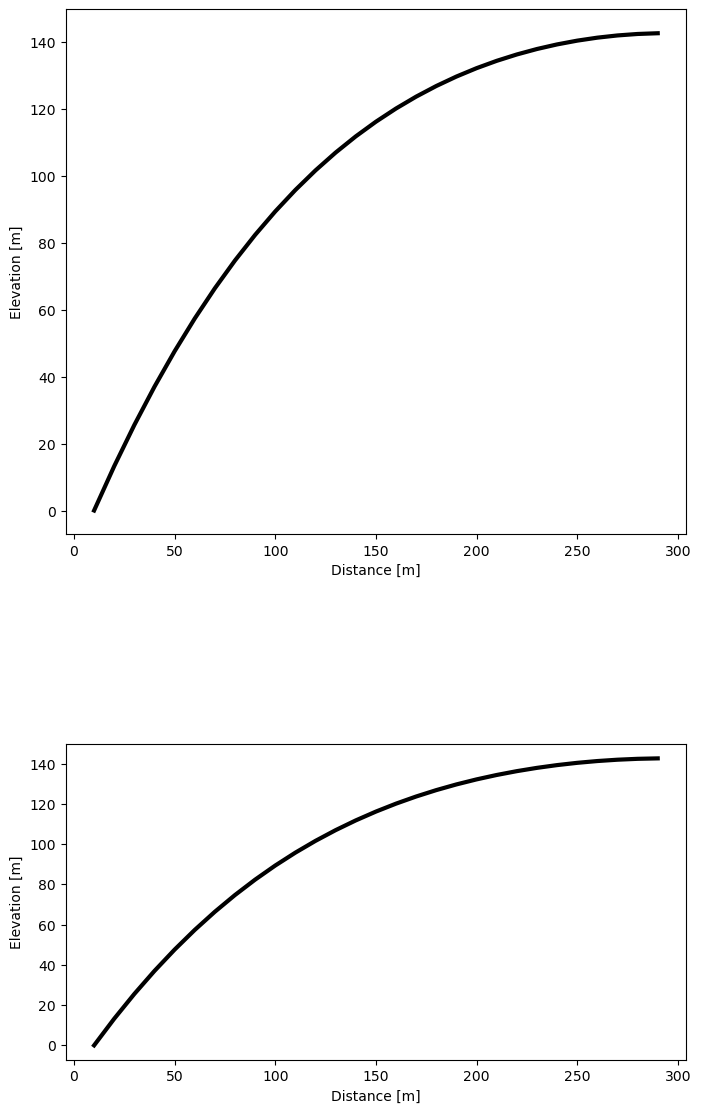

In [6]:
# Plotting end-of-simulation profile

fig, ax = plt.subplots(2,1,
                       figsize=(8,15))
xvec = np.cumsum(np.ones_like(grid.at_node['topographic__elevation'][grid.nodes][:-1,1]) * grid.dx)
for n in range(2):
    ax[n].plot(xvec, grid.at_node['topographic__elevation'][grid.nodes][:-1,1], color = 'black', linewidth=3)
    ax[n].set_xlabel('Distance [m]')
    ax[n].set_ylabel('Elevation [m]')
    if n ==1:
        ax[n].set_aspect('equal', 'box')

plt.show()

In [7]:
# Test with varied diffusivity

grid = RasterModelGrid((int(nrows), int(ncols)), xy_spacing=int(dx))
grid.set_closed_boundaries_at_grid_edges(True, True, True, False)
topo = grid.add_zeros('topographic__elevation', at='node')
hillslope__diffusivity = grid.add_ones('hillslope__diffusivity', at='node')
hillslope__diffusivity *= 0.001
start_low_d = 4
end_low_d = 9
hillslope__diffusivity[grid.nodes[start_low_d:end_low_d, 1]] *= 0.4
de_diffuser = DE_Diffuser(grid,
                          diffusivity =hillslope__diffusivity)


In [8]:
# Main loop
Ttot = 10000000

t_clock = de_diffuser._t_clock
while t_clock < Ttot:
    de_diffuser.select_and_update_event()
    de_diffuser.event_synchronization()
    de_diffuser.event_scheduling()
    t_clock = de_diffuser._t_clock
    print('time = ', np.round(t_clock,1), ' -->  ', np.round(t_clock/Ttot,1)*100, ' % out of Ttot')


time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  0.0  -->   0.0  % out of Ttot
time =  10000.0  -->   0.0  % out of Ttot
time =  19974.9  -->   0.0  % out of Ttot
time =  20036.4  -->   0.0  % out of Ttot
time =  20090.8  -->   0.0  % out of Ttot
time =  20989.0  -->   0.0  % out of Ttot
time =  30914.1  -->   0.0  % out of Ttot
time =  31053.6  -->   0.0  % out of Ttot
time =  31167.6  -->   0.0  % out of Ttot
time =  33402.8  -->   0.0  % out of Ttot
time =  43287.7  -->   0.0  % out of Ttot
time =  43495.8  -->   0.0  % out of Ttot
time =  43787.6  -->   0.0  % out of Ttot
time =  47465.9  -->   0.0  % out of Ttot
time =  57319.6  -->   1.0  % out of Ttot
time =  57608.5  -->   1.0  % out of Ttot
time =  58171.7  -->   1.0  % out of Ttot
time =  63423.5  -->   1.0  % out of Ttot
time =  73255.6  -->   1.0  % out of Ttot
time =  73658.1 

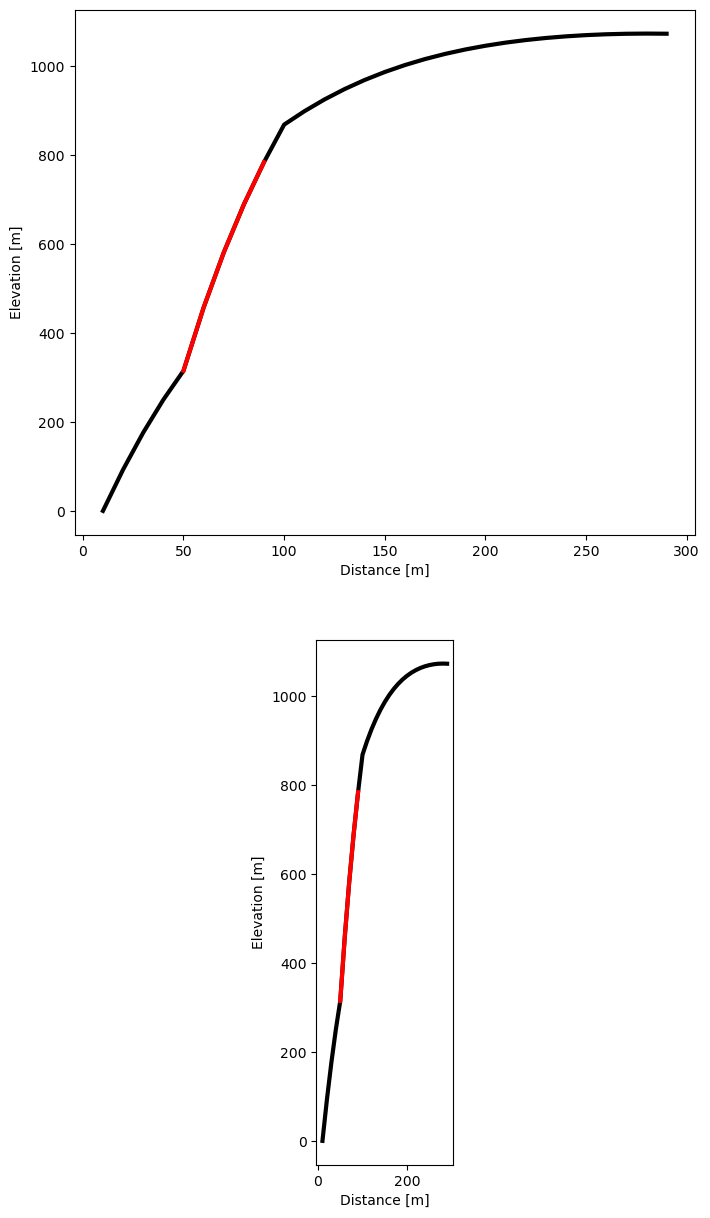

In [9]:
# Plotting end-of-simulation profile

fig, ax = plt.subplots(2,1,
                       figsize=(8,15))
xvec = np.cumsum(np.ones_like(grid.at_node['topographic__elevation'][grid.nodes][:-1,1]) * grid.dx)
for n in range(2):
    ax[n].plot(xvec, grid.at_node['topographic__elevation'][grid.nodes][:-1,1], color = 'black', linewidth=3)
    ax[n].plot(xvec[start_low_d: end_low_d],grid.at_node['topographic__elevation'][grid.nodes][start_low_d:end_low_d,1], color = 'red', linewidth=3)
    ax[n].set_xlabel('Distance [m]')
    ax[n].set_ylabel('Elevation [m]')
    if n ==1:
        ax[n].set_aspect('equal', 'box')

plt.show()